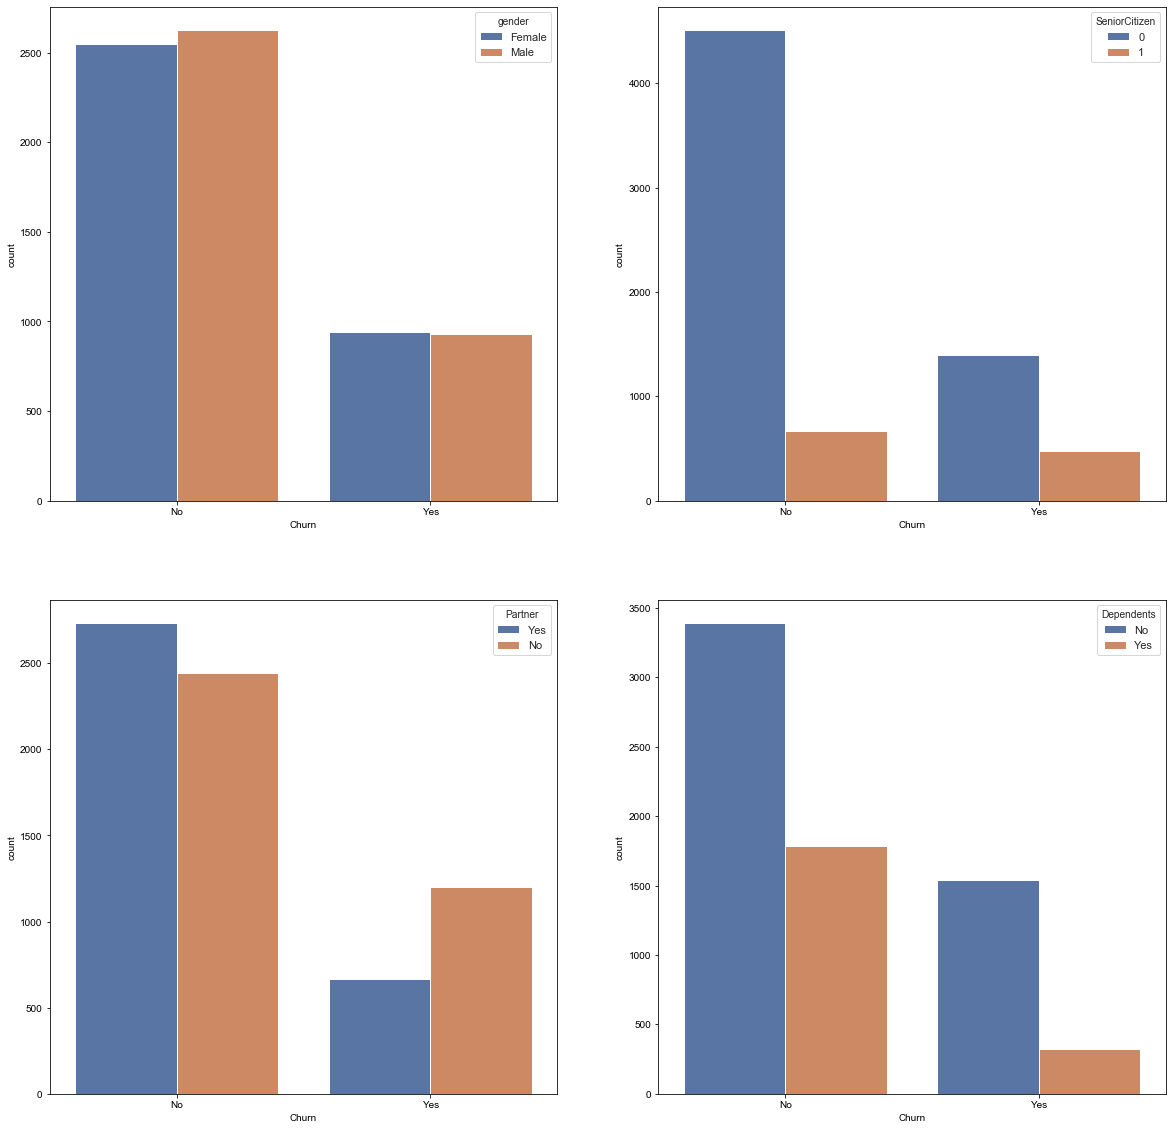

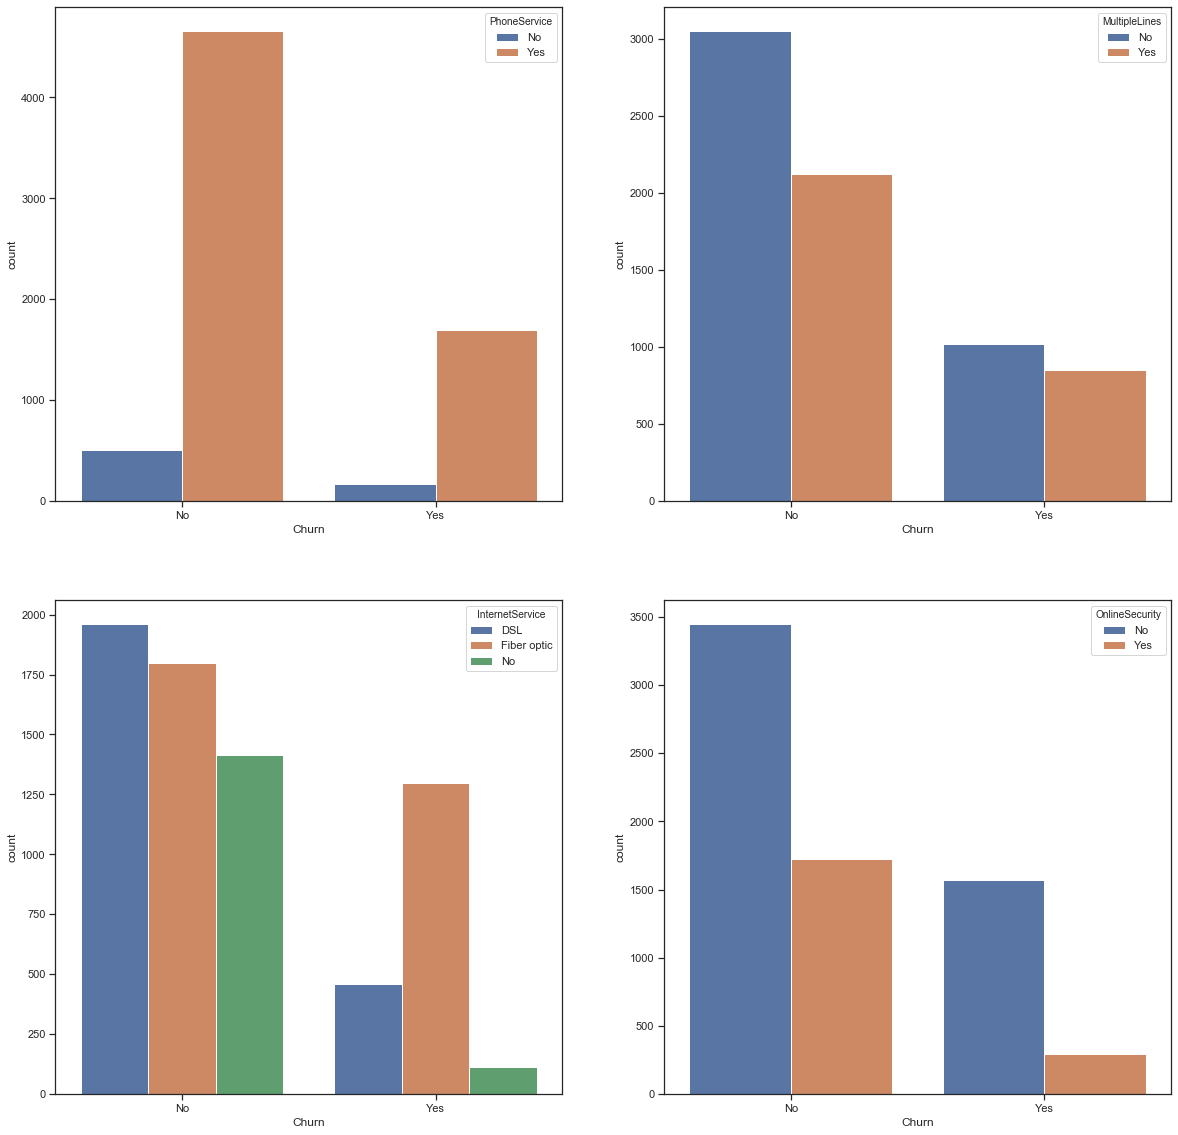

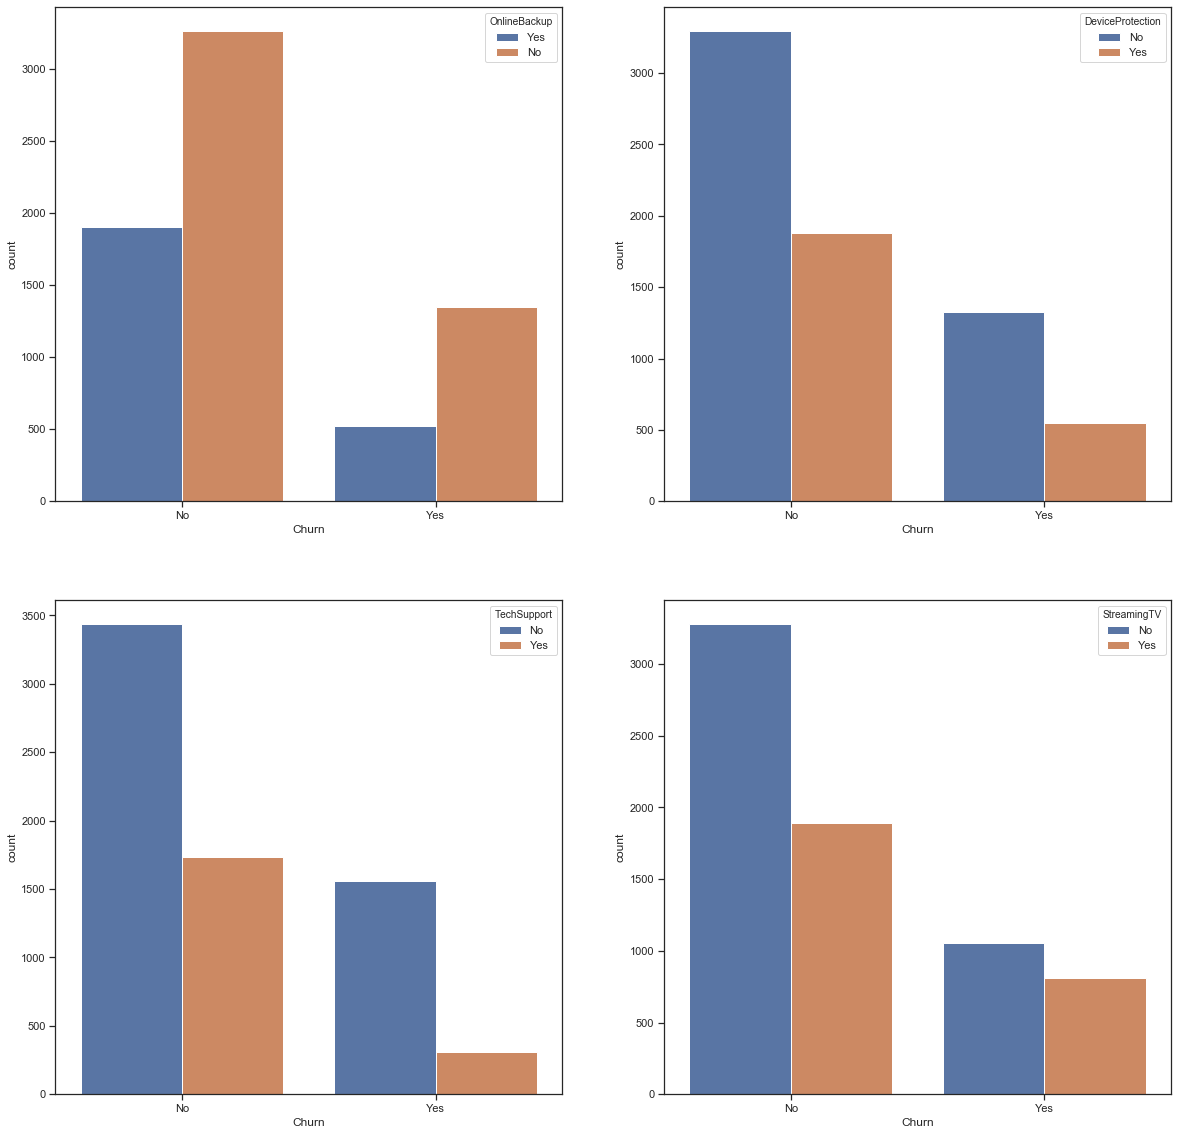

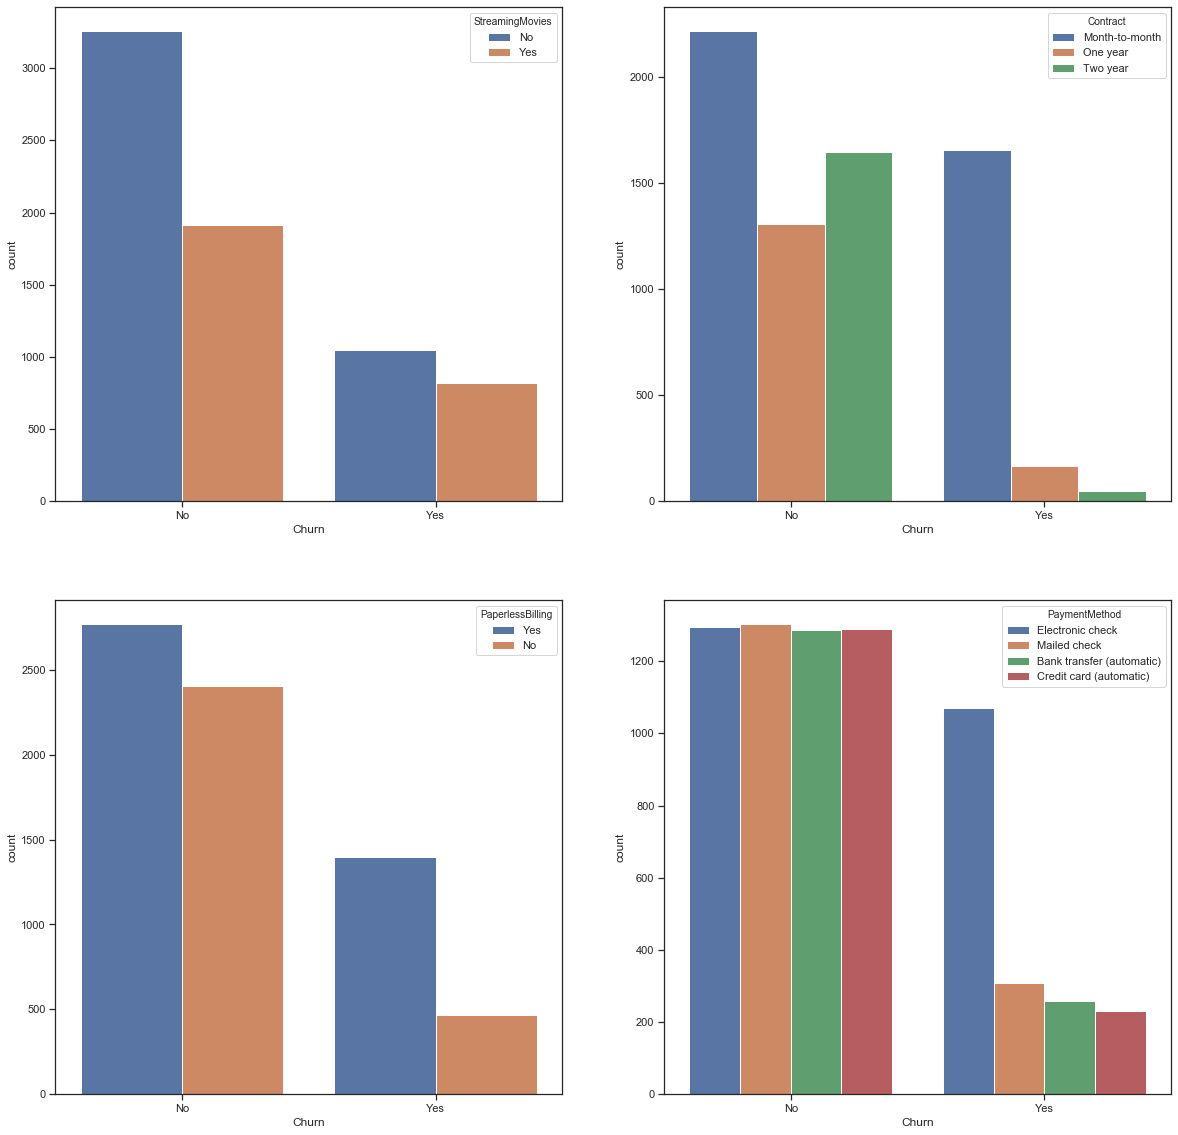

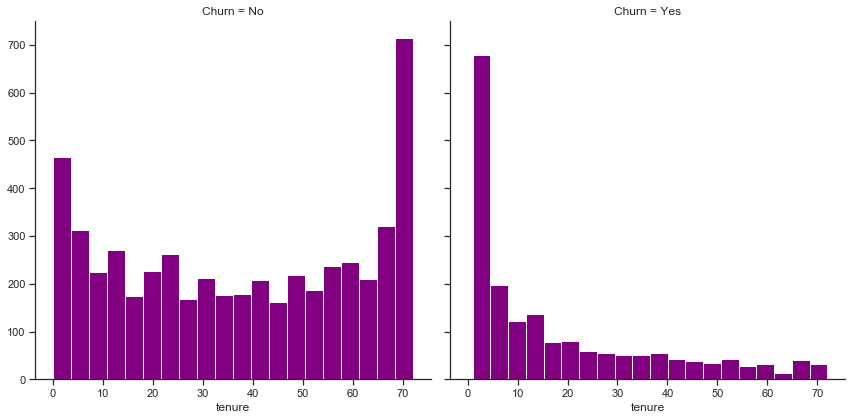

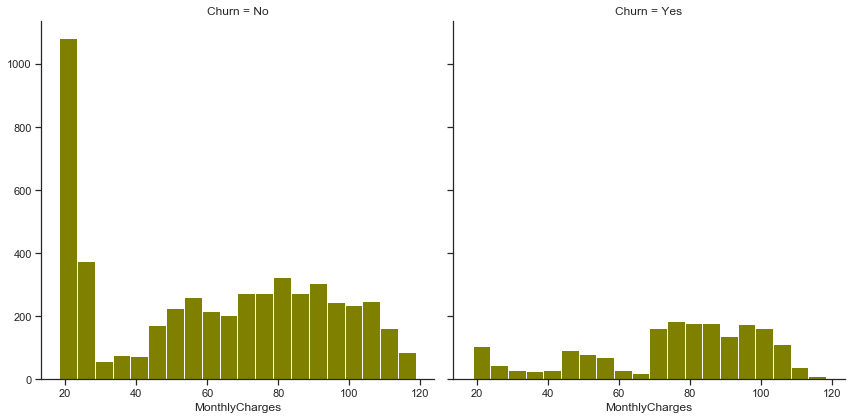

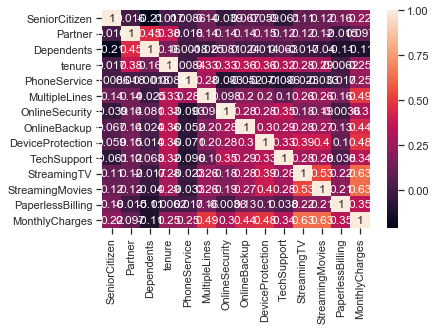

Results using Gaussian naive bayes is
Accuracy : 76.36621717530163
Precision : 0.525987525987526
Recall : 0.7067039106145251
Area Under ROC Curve 0.7448838297125909



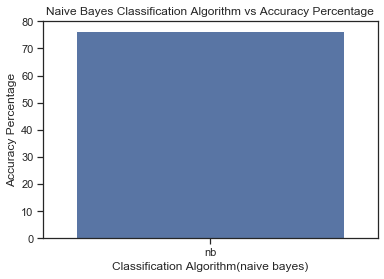

Text(89.18, 0.5, 'Predicted')

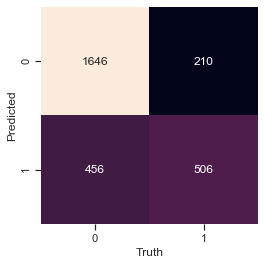

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('https://raw.githubusercontent.com/ankitanand4793/ds-project/master/dataset.csv')

replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_cols : 
    df[i]=df[i].replace({'No internet service' : 'No'})

df["MultipleLines"]=df["MultipleLines"].replace({'No phone service' : 'No'})

data_cat1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
data_cat2 = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity']
data_cat3 = ['OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV']
data_cat4 = ['StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod']

fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat1):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)
plt.show()

fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat2):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)
plt.show()

fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat3):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)
plt.show()

fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat4):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)
plt.show()

NumHistTenure = sns.FacetGrid(df,col="Churn",height=6,aspect=1)
NumHistTenure = NumHistTenure.map(plt.hist, "tenure",bins=20,color="purple")
plt.show()

NumHistMC = sns.FacetGrid(df,col="Churn",height=6,aspect=1)
NumHistMC = NumHistMC.map(plt.hist, "MonthlyCharges",bins=20,color="olive")
plt.show()

df["Partner"] = df["Partner"].replace({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].replace({"Yes":1,"No":0})
df["PhoneService"] = df["PhoneService"].replace({"Yes":1,"No":0})
df["MultipleLines"] = df["MultipleLines"].replace({"Yes":1,"No":0})
df["OnlineSecurity"] = df["OnlineSecurity"].replace({"Yes":1,"No":0})
df["OnlineBackup"] = df["OnlineBackup"].replace({"Yes":1,"No":0})
df["DeviceProtection"] = df["DeviceProtection"].replace({"Yes":1,"No":0})
df["TechSupport"] = df["TechSupport"].replace({"Yes":1,"No":0})
df["StreamingTV"] = df["StreamingTV"].replace({"Yes":1,"No":0})
df["StreamingMovies"] = df["StreamingMovies"].replace({"Yes":1,"No":0})
df["PaperlessBilling"] = df["PaperlessBilling"].replace({"Yes":1,"No":0})

df.drop(['TotalCharges'],axis=1,inplace=True)

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

labelencoder_X_0 = LabelEncoder()
X[:, 0] = labelencoder_X_0.fit_transform(X[:, 0]) 
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])
labelencoder_X_14 = LabelEncoder()
X[:, 14] = labelencoder_X_14.fit_transform(X[:, 14])
labelencoder_X_16 = LabelEncoder()
X[:, 16] = labelencoder_X_16.fit_transform(X[:, 16])

X = X.astype(float)
labelencoder_y= LabelEncoder()
y = labelencoder_y.fit_transform(y)

Var_Corr = df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=59)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#naive bayesian model
model = GaussianNB()
model.fit(X_train,y_train)
predicted= model.predict(X_test)
nb=metrics.accuracy_score(y_test, predicted)*100
print('Results using Gaussian naive bayes is')
print('Accuracy :',nb)
print('Precision :',metrics.precision_score(y_test,predicted))
print('Recall :',metrics.recall_score(y_test,predicted))
print('Area Under ROC Curve',metrics.roc_auc_score(y_test,predicted))
print()

Accuracy=[]
Accuracy.append(nb)

ax1=sns.barplot(x=['nb'],y=Accuracy)
ax1.set(title="Naive Bayes Classification Algorithm vs Accuracy Percentage", xlabel="Classification Algorithm(naive bayes)", ylabel="Accuracy Percentage")
plt.xticks(rotation=0)
plt.show()

mat = confusion_matrix(predicted, y_test)
names = np.unique(predicted)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
